<a href="https://colab.research.google.com/github/omartru10/Deteccio-del-abecedario/blob/main/Prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [475]:
import time
import os, os.path
import random
import cv2
import glob
import keras
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
#Realizar el aumento de datos con varias transformaciones. Al final, graficar 10 como ejemplo
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras  import datasets, layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [476]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [477]:
#modeloCNN2_AD =  tf.keras.models.load_model('//content/drive/MyDrive/datasets/Modelos/modeloDenso_AD.h5')
modeloCNN2_AD =  tf.keras.models.load_model('/content/drive/MyDrive/datasets/Models/model_CNN2_2.h5')

In [478]:
dire_img = os.listdir('/content/drive/MyDrive/Fotos/Predic')

In [479]:
dire_img[7]

'Mano_24.jpg'

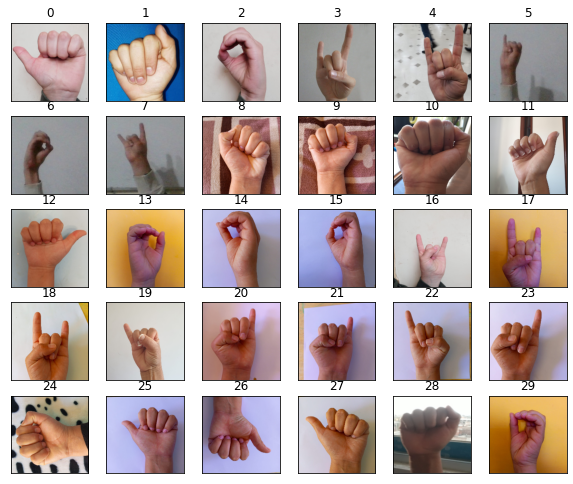

In [480]:
DIR = '/content/drive/MyDrive/Fotos/'
imagenes = []
plt.figure(figsize=(10,10))
for i, file in enumerate(dire_img):
    folder_name = "Predic"
    
    #print(folder_name)
    file_path = os.path.join(DIR,folder_name, file)
    # Leemos la imagen
    image = cv2.imread(file_path)
    # Cambiamos el tamaño a 200 x 200
    image = cv2.resize(image, (200,200))   
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape(200, 200, 3)
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(i)
    plt.imshow(image)
    imagenes.append(image)

In [481]:
imgs = []
TAMANO_IMG = 200
for imagen  in imagenes: #Todos los datos
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1)
  imgs.append(imagen)



In [482]:
X = np.array(imgs).astype(float) / 255


In [483]:
X.shape

(30, 200, 200, 1)

In [484]:
codes = ['A', 'E', 'I','O','U']

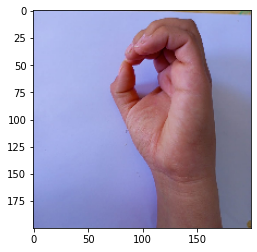

O


In [485]:
indice = 15
img = X[indice]
img = (np.expand_dims(img,0))

plt.figure
plt.imshow(imagenes[indice].reshape(200, 200,3))
plt.grid(False)
plt.show()

predic = modeloCNN2_AD.predict(img)

print(codes[np.argmax(predic[0])])

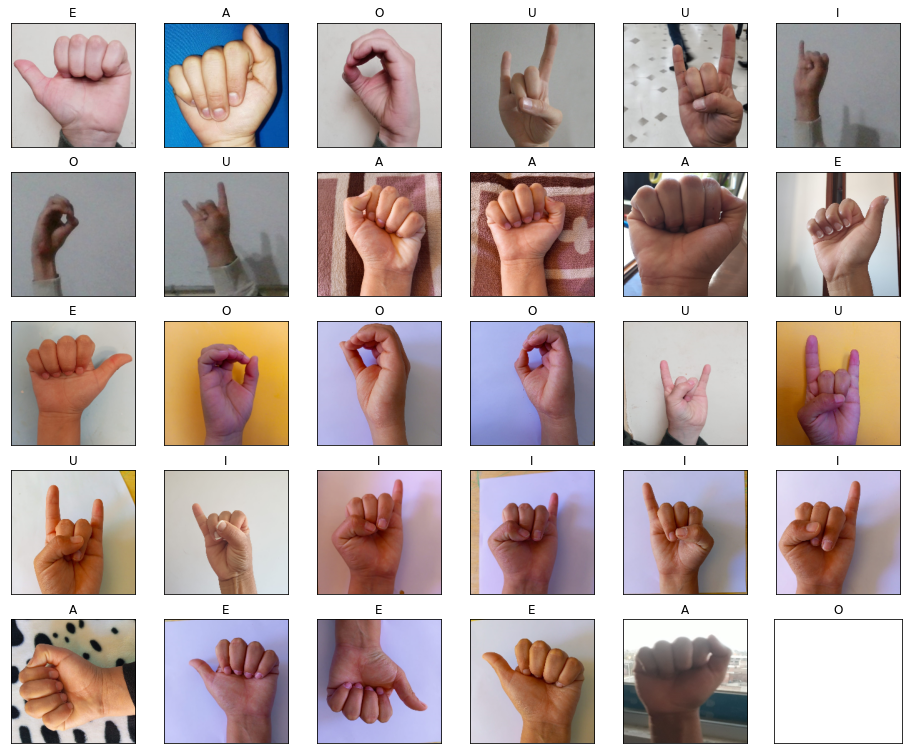

In [486]:
plt.figure(figsize=(16,16))
for i,img in enumerate(X):
    #img = X[i]
    img = (np.expand_dims(img,0))

    plt.imshow(imagenes[i-1].reshape(200, 200,3))
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    predic = modeloCNN2_AD.predict(img)
    plt.title(codes[np.argmax(predic[0])])